<a href="https://colab.research.google.com/github/claraaamaral/analise_de_dados/blob/main/Catapora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Analíse de Dados - Casos de Catapora

Estatística aplicada
Discentes: Maria Clara e Priscilla Melo
Relatório da I unidade

## Informações sobre o Dataset:

Sobre o conjunto de dados
Os dados estão relacionados à Hungria e seus condados. Abrangeram o período de 01/03/2015 a 29/12/2014 e foram atualizados semanalmente.
Ao longo das colunas temos a data em que os dados foram coletados e os respectivos municípios.

Inspiração
Você pode realizar uma análise exploratória dos dados, trabalhando com Pandas ou Numpy.
Visualizações interessantes podem ser realizadas usando, por exemplo, bibliotecas Python como Matplotlib para traçar histogramas para cada município.
Uma análise e previsão de séries temporais também podem ser realizadas para todos os municípios.
Além disso, este conjunto de dados é muito bom para praticar consultas usando SQL ou Pandas.
Lembre-se de votar se você achou o conjunto de dados útil :).

Metodologia de coleta
Os dados foram obtidos no seguinte link: https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases# . As datas foram formatadas, pois continham diferentes formatos de data e hora.

Reconhecimento
Casos de catapora na Hungria: um conjunto de dados de referência para processamento de sinais espaço-temporais com redes neurais gráficas
Benedek Rozemberczki, Paul Scherer, Oliver Kiss, Rik Sarkar, Tamas Ferenci.

## Importando Bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Leitura do Dataset:

In [2]:
Diagnostico = pd.read_csv('https://raw.githubusercontent.com/claraaamaral/analise_de_dados/main/hungary_chickenpox_data.csv')

## Analíse da Tabela:

### visão geral dos dados:

In [3]:
Diagnostico

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,3/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,8/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


A tabela acima possui 522 amostras e 21 variáveis. 

### Dimesões da tabela:

In [4]:
# numpy.shape (): nos dá o número de elementos em cada dimensão de um array.
Diagnostico.shape
# Nesse caso 569 linhas e 33 Colunas

(522, 21)

Conclusão a partir do que foi introduzido:

*   Temos 569 linhas, consequentemente 569 pacientes
*   Temos 33 Colunas, ou seja, atributos que podem caracterizar o paciente e o cancer que ele possui;
*   Dos 569 temos 212 casos malignos. Nessa tabela representando que os casos mais graves são a minoria;



### Características dos atributos:

In [5]:
Diagnostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

Conclusão a partir das informações:
1.   Não há dados faltosos
2.   A maioria dos valores são números inteiros
3.   Somente o atributo data é uma string.

### Características Descritivas:

In [6]:
Diagnostico.describe()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,101.245211,34.204981,37.166667,28.911877,57.082375,31.488506,33.272031,41.436782,47.097701,29.691571,40.869732,25.643678,21.850575,86.101533,27.609195,29.854406,20.352490,22.467433,40.636015,19.873563
std,76.354872,32.567222,36.843095,37.618092,50.725437,33.790208,31.397989,36.014297,44.610836,31.857750,37.283299,24.467995,22.025999,66.773741,26.724236,31.814630,23.273025,25.006638,40.699471,21.999636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.250000,8.000000,8.000000,4.000000,14.250000,6.000000,7.000000,9.000000,11.000000,6.250000,10.000000,6.000000,4.000000,28.250000,6.000000,6.000000,4.000000,3.000000,7.250000,4.000000
50%,93.000000,25.000000,29.500000,14.000000,46.500000,20.500000,24.000000,35.000000,37.000000,21.000000,31.000000,19.000000,15.000000,81.000000,20.500000,18.500000,12.000000,13.000000,32.000000,13.000000
75%,149.000000,51.000000,53.000000,38.750000,83.750000,47.000000,51.750000,63.000000,68.000000,41.000000,61.750000,39.000000,32.750000,129.750000,41.000000,45.000000,29.000000,34.000000,59.000000,31.000000
max,479.000000,194.000000,274.000000,271.000000,355.000000,199.000000,164.000000,181.000000,262.000000,210.000000,224.000000,160.000000,112.000000,431.000000,155.000000,203.000000,131.000000,141.000000,230.000000,216.000000


A maior média obtida foi o no município Budapest e o menor, no Zala. Podemos concluir ainda que, o mínimo de casos é =0 e os valores no máximo, passam de 100.

In [7]:
Diagnostico.describe(include='object')

,Date
count,522
unique,522
top,3/01/2005
freq,1


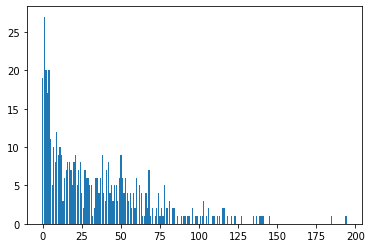

In [10]:
plt.bar(Diagnostico.BARANYA.value_counts().index, Diagnostico.BARANYA.value_counts().values);

A partir do gráfico acima, nota-se que, no município de Baranya, não houve mais de 25 repetições do mesmo diagnóstico por semana. E, ainda, o padrão de casos semanais era entre 0 e 100. Onde passar de 100 eram semanas de alto contágio.

In [12]:
# Fazendo referencia a algumas colunas
# Dois colchetes nesse caso
associacao1 = Diagnostico[['BARANYA', 'BACS']] 
print(associacao1)

     BARANYA  BACS
0         79    30
1         60    30
2         44    31
3         49    43
4         78    53
..       ...   ...
517       12    41
518       39    31
519        7    15
520       23     8
521       42    49

[522 rows x 2 columns]


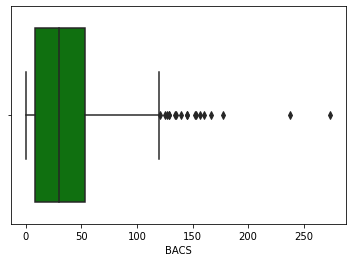

In [13]:
sb.boxplot(data=Diagnostico, x='BACS', color="green")

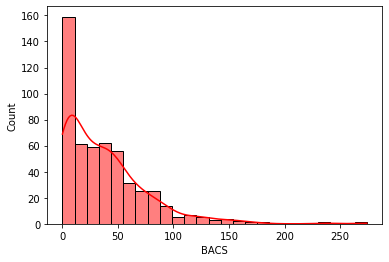

In [14]:
sb.histplot(data=Diagnostico, x='BACS', kde=True, color="red")

Nova seção